Importing necesssary libraries 

In [9]:
from stegano import lsb
from PIL import Image
import pygame
import numpy as np
import sys
import os
import cv2


pygame 2.5.2 (SDL 2.28.3, Python 3.11.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


Defining a function for Encoding test inside an image

In [2]:
# Encode message into image
def encode_image(image_path, message, output_path):
    secret_image = lsb.hide(image_path, message)
    secret_image.save(output_path)
    

Similarly, Now we define a function for Decoding the hidden text inside the image

In [3]:
# Decode message from image
def decode_image(image_path):
    secret_message = lsb.reveal(image_path)
    return secret_message


Defining paths to our original and altered image and also the message that is being hidden

In [4]:
# Example usage
original = "/Users/vishalbhatia/Documents/MSc. Data Science and AI/PROJECTS/MINOR PROJECTS/Steganography minor/Dataset/cover/logo.png"
altered = "/Users/vishalbhatia/Documents/MSc. Data Science and AI/PROJECTS/MINOR PROJECTS/Steganography minor/Dataset/stego/logo.png"
message_to_hide = "Hello everyone this message is hidden by Vishal. The main purpose of this event is to show how steganography in images work. we used least significant bit method here in steganography for our prroject, Since this is only a minor base project we only did a little comparison of real and altered image to see how hidden data works in our real life events. THANKYOU"



Now, let us begin with Encoding -

In [5]:
# Encoding
encode_image(original, message_to_hide, altered)


Now the image has been encoded, Now let us try to identify it with naked eyes

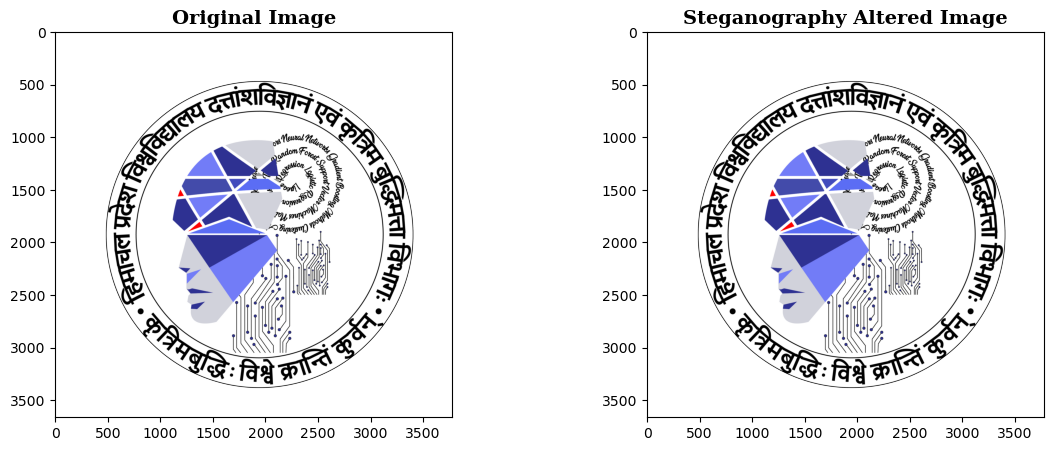

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# See the 2 images side by side.
f, ax = plt.subplots(1, 2, figsize=(14,5))
                           
original = mpimg.imread('/Users/vishalbhatia/Documents/MSc. Data Science and AI/PROJECTS/MINOR PROJECTS/Steganography minor/Dataset/cover/logo.png')
original_plot = ax[0].imshow(original)
ax[0].set_title('Original Image', fontsize=14, fontweight='bold', fontfamily='serif')

altered = mpimg.imread('/Users/vishalbhatia/Documents/MSc. Data Science and AI/PROJECTS/MINOR PROJECTS/Steganography minor/Dataset/stego/logo.png')
altered_plot = ax[1].imshow(altered)
ax[1].set_title('Steganography Altered Image', fontsize=14, fontweight='bold', fontfamily='serif')  # Add title for the altered image with custom font and size

plt.show()


As we can see here that there is no difference that we can tell with naked eyes. Let us try some other methods.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


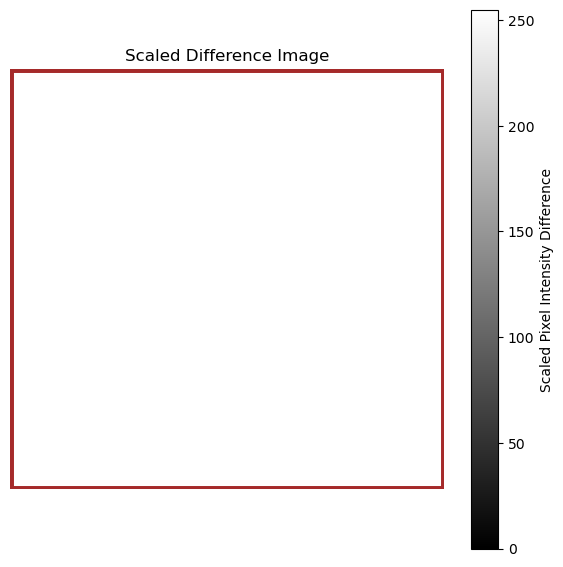

In [22]:
import matplotlib.pyplot as plt #For plotting the outputs.
import matplotlib.image as mpimg #Provides function to read images.
import numpy as np #number manipulation specially for checking the pixel difference.
import matplotlib.patches as patches #for adding a border because our output is white and so is the background of our enviornment.

# Loading the original and altered images.
original = mpimg.imread('/Users/vishalbhatia/Documents/MSc. Data Science and AI/PROJECTS/MINOR PROJECTS/Steganography minor/Dataset/cover/logo.png')
altered = mpimg.imread('/Users/vishalbhatia/Documents/MSc. Data Science and AI/PROJECTS/MINOR PROJECTS/Steganography minor/Dataset/stego/logo.png')

# Computing the absolute difference between the two images.
diff_image = np.abs(original.astype(int) - altered.astype(int)).astype(np.uint8)

# Scaling the pixel differences to a larger range for better visualization.
diff_image_scaled = diff_image * 10000000000

# Plotting of difference image
plt.figure(figsize=(7, 7))
plt.imshow(diff_image_scaled, cmap='gray')
plt.title('Scaled Difference Image')
plt.axis('off')

# Adding a border around the image
border_color = 'brown'
border_width = 5
plt.gca().add_patch(patches.Rectangle((0, 0), diff_image_scaled.shape[1], diff_image_scaled.shape[0], linewidth=border_width, edgecolor=border_color, facecolor='none'))

plt.colorbar(label='Scaled Pixel Intensity Difference')
plt.show()


Now let us check the Euclidean distance between the pixels.

In [23]:
# From image to array 
# (vectorize the matrix to be able to feed it to the cosine function)
original_vector = np.array(original).flatten()
altered_vector = np.array(altered).flatten()

print('Original shape:', original_vector.shape, '\n' +
      'Altered shape:', altered_vector.shape)


# Distance between the original image and itself (should be 0, because they are identical)
dist1 = np.sum(original_vector - original_vector)
print('Dist1:', dist1)

# Distance between the original image and altered image
dist2 = np.sum(original_vector - altered_vector)
print('Dist2:', dist2)

Original shape: (55399680,) 
Altered shape: (55399680,)
Dist1: 0.0
Dist2: 6.2196074


Above we can see that Dist2 is not zero it contains some value means it surely contains some hidden information.

Structural Similarity Index (SSIM):


In [62]:
from skimage.metrics import structural_similarity as ssim
import cv2

# Load original and altered images
original_img = cv2.imread('/Users/vishalbhatia/Documents/MSc. Data Science and AI/PROJECTS/MINOR PROJECTS/Steganography minor/Dataset/cover/logo.png', cv2.IMREAD_GRAYSCALE)
altered_img = cv2.imread('/Users/vishalbhatia/Documents/MSc. Data Science and AI/PROJECTS/MINOR PROJECTS/Steganography minor/Dataset/stego/logo.png', cv2.IMREAD_GRAYSCALE)

# Compute SSIM
ssim_index = ssim(original_img, altered_img)

print("SSIM:", ssim_index)


SSIM: 0.9999998580904863


The approximately 1 value suggest that the compression is well done so that the naked  eyes cannot tell the difference

Peak Signal-to-Noise Ratio (PSNR):


In [63]:
import cv2

# Load original and altered images
original_img = cv2.imread('/Users/vishalbhatia/Documents/MSc. Data Science and AI/PROJECTS/MINOR PROJECTS/Steganography minor/Dataset/cover/logo.png')
altered_img = cv2.imread('/Users/vishalbhatia/Documents/MSc. Data Science and AI/PROJECTS/MINOR PROJECTS/Steganography minor/Dataset/stego/logo.png')

# Calculate PSNR
psnr = cv2.PSNR(original_img, altered_img)

print("PSNR:", psnr)


PSNR: 92.31345697438995


security analysis of a steganographic implementation.

Statistical Analysis (Example: Mean and Standard Deviation)

In [65]:
original_mean = np.mean(original_img)
original_std = np.std(original_img)
altered_mean = np.mean(altered_img)
altered_std = np.std(altered_img)

In [66]:
print("Original Image Mean:", original_mean)
print("Original Image Std Deviation:", original_std)
print("Altered Image Mean:", altered_mean)
print("Altered Image Std Deviation:", altered_std)

Original Image Mean: 226.7963903040595
Original Image Std Deviation: 73.59641329111396
Altered Image Mean: 226.79635213296058
Altered Image Std Deviation: 73.59639892250594


As we can see that the values of original and Altered image does not completely matches this clearly suggest that some hidden information is there.

Now let's proceed further to check what actually is happening here.

Now, let us define a variable that contains the altered image path so that we can check whether it contains any hidden information or not

In [6]:
check_image = "/Users/vishalbhatia/Documents/MSc. Data Science and AI/PROJECTS/MINOR PROJECTS/Steganography minor/Dataset/stego/logo.png"

Now, let us define a function that will decide whether the check_image has been stegnographed or not and cherry on the cake it will play an alarm sound if it detects anything shady.

In [10]:
# Detect steganography in an image and play an alarm sound.

def detect_steganography(image_path):
    try:
        # Attempt to reveal a message
        secret_message = lsb.reveal(image_path)
        if secret_message:
            print("Steganography detected! Message found:\n", secret_message)
            # Play sound
            play_sound('/Users/vishalbhatia/Documents/MSc. Data Science and AI/PROJECTS/MINOR PROJECTS/Steganography minor/Stego_warning.mp3')
        else:
            print("No steganography detected.")
    except Exception as e:
        print("Error:", e)

def play_sound(sound_file):
    try:
        pygame.mixer.init()
        pygame.mixer.music.load(sound_file)
        pygame.mixer.music.play()
        while pygame.mixer.music.get_busy():
            pygame.time.Clock().tick(10)
    except Exception as e:
        print("Error playing sound:", e)

Now let us use the function 

In [24]:
# Detect steganography
detect_steganography(check_image)


Steganography detected! Message found:
 Hello everyone this message is hidden by Vishal. The main purpose of this event is to show how steganography in images work. we used least significant bit method here in steganography for our prroject, Since this is only a minor base project we only did a little comparison of real and altered image to see how hidden data works in our real life events. THANKYOU


As we can see the hidden information has been exposed. Now let us see how they can enter our systems.


Firstly let's discuss the ways by which the stego image will not be impacted:
1 > By media transfer devices such as pendrive, portable SSDs, HDDs and many other.
2 > By nginix and apache servers.
3 > By compressed file sharing like .zip, .tar files.
4 > By directly shared files on social media.
and many other ways.

Let us study all three of them one by one :

In [25]:
#Method 1 By pendrives.
check_method_1 = "/Volumes/VALHALLA/logo.png"

In [29]:
# Detect steganography in Method 1
detect_steganography(check_method_1)


Steganography detected! Message found:
 Hello everyone this message is hidden by Vishal. The main purpose of this event is to show how steganography in images work. we used least significant bit method here in steganography for our prroject, Since this is only a minor base project we only did a little comparison of real and altered image to see how hidden data works in our real life events. THANKYOU


In [68]:
#Method 2 By apache2 servers.
check_method_2 = "/Users/vishalbhatia/Documents/MSc. Data Science and AI/PROJECTS/MINOR PROJECTS/Steganography minor/apache/logo.png"

In [69]:
# Detect steganography in Method 2
detect_steganography(check_method_2)

Steganography detected! Message found:
 Hello everyone this message is hidden by Vishal. The main purpose of this event is to show how steganography in images work. we used least significant bit method here in steganography for our prroject, Since this is only a minor base project we only did a little comparison of real and altered image to see how hidden data works in our real life events. THANKYOU


In [30]:
#Method 3 By Sharing file in .zip or .tar format.
check_method_3 = "/Users/vishalbhatia/Documents/MSc. Data Science and AI/PROJECTS/MINOR PROJECTS/Steganography minor/logo.png"


In [31]:
# Detect steganography in Method 3
detect_steganography(check_method_3)


Steganography detected! Message found:
 Hello everyone this message is hidden by Vishal. The main purpose of this event is to show how steganography in images work. we used least significant bit method here in steganography for our prroject, Since this is only a minor base project we only did a little comparison of real and altered image to see how hidden data works in our real life events. THANKYOU


In [32]:
#Method 4 By Directly Forwarding the file (we will take example of ) 
check_method_4 = "/Users/vishalbhatia/Documents/MSc. Data Science and AI/PROJECTS/MINOR PROJECTS/Steganography minor/IMG_2068.PNG"

In [33]:
# Detect steganography in Method 4
detect_steganography(check_method_4)


Steganography detected! Message found:
 Hello everyone this message is hidden by Vishal. The main purpose of this event is to show how steganography in images work. we used least significant bit method here in steganography for our prroject, Since this is only a minor base project we only did a little comparison of real and altered image to see how hidden data works in our real life events. THANKYOU


Now let us discuss the ways in which the stego images get affected and lose it's information:
1 > By forwarding it through social media plateforms(in this case the image file is firstly saved and then sent to the target via whatsapp.)

....and many other ways.

In [58]:
#Method 1 By receiving file as a format which is not it's original foramt.
check_method_n1 = "/Users/vishalbhatia/Documents/MSc. Data Science and AI/PROJECTS/MINOR PROJECTS/Steganography minor/SAVE_20240404_221615.jpg"

In [59]:
# Detect steganography in Method n1
detect_steganography(check_method_n1)


Error: Impossible to detect message.


Even if we try to change the extention again it won't work.Because the image has been compressed extremely and the data has been lost.

In [60]:
check_method_n2 = "/Users/vishalbhatia/Desktop/Testing/Special_case/SAVE_20240404_221615.png"

In [61]:
# Detect steganography in Method n2
detect_steganography(check_method_n2)


Error: Impossible to detect message.


some special cases

In [55]:
#Unique Ways, By Changing it's extention.
#Case 1 .png(received file) > .jpg

check_method_special = "/Users/vishalbhatia/Desktop/Testing/logo.jpg"

In [56]:
# Detect steganography in Method 1
detect_steganography(check_method_special)


Steganography detected! Message found:
 Hello everyone this message is hidden by Vishal. The main purpose of this event is to show how steganography in images work. we used least significant bit method here in steganography for our prroject, Since this is only a minor base project we only did a little comparison of real and altered image to see how hidden data works in our real life events. THANKYOU


In [44]:
#Unique Ways, By Changing it's extention to original again.
#Case 2 .png(received file) > .jpg > .png

check_method_special_2 = "/Users/vishalbhatia/Desktop/Testing/Special_case_2/logo.png"

In [45]:
# Detect steganography in Method 1
detect_steganography(check_method_special_2)


Steganography detected! Message found:
 Hello everyone this message is hidden by Vishal. The main purpose of this event is to show how steganography in images work. we used least significant bit method here in steganography for our prroject, Since this is only a minor base project we only did a little comparison of real and altered image to see how hidden data works in our real life events. THANKYOU
